<div class="alert alert-danger">

<h1>Take notice!</h1>
<ul>
    <li>This class will be recorded</li>
</ul>
    
</div>

# An Open Data case study:  Hot-spots for Arrests in LA over time


## What is an API?

Some examples:

Mapping API's

- [Google Maps API](https://developers.google.com/maps/documentation/javascript/overview#maps_map_simple-javascript)
- [Leaflet](https://leafletjs.com/)
- [Mapbox](https://docs.mapbox.com/mapbox-gl-js/example/)

Data API's
- [Twitter API](https://developer.twitter.com/en)
- [Metro API](https://developer.metro.net/api/)
- [Census API](https://www.census.gov/data/developers/guidance/api-user-guide.Example_API_Queries.html)


# Part 1: Mini project and code review: Mapping gun violence

As humans, we are troubled by recent events related to police brutality and gun violence. As planners, we are equipped with tools to do something about it. A quick scan reveals that open data exists on these issues, and one such source can be found with the Washington Post.

- https://github.com/washingtonpost/data-police-shootings

When you find a csv file posted in the GitHub account that is trustworthy, you can directly access it and pull the data into a Jupyter notebook (you may use this method to access your own csv data for example). However, you must first click on the "View raw" link and use **that** URL.

<img src="images/git%20view%20raw.png" width=600>

Next, copy the URL that produces the raw view of the data.

<img src="images/git raw url.png" width="600">

Now we can investigate and see if this data is usable within our Jupyter interface. Let's begin by importing some libraries.

In [1]:
# libraries
import pandas as pd
import geopandas as gpd

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

import contextily as ctx

Hey? What is `contextily`? Yes, it's a new library we are using that allows us to choose a basemap to put our data on top of. We'll learn more about this as we move along.

- https://github.com/darribas/contextily

In [2]:
# import the data into a new variable
df = pd.read_csv("https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/v2/fatal-police-shootings-data.csv")

In [3]:
# check the data, specifically for the latitude and longitude columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9319 entries, 0 to 9318
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          9319 non-null   int64  
 1   date                        9319 non-null   object 
 2   threat_type                 9246 non-null   object 
 3   flee_status                 8035 non-null   object 
 4   armed_with                  9104 non-null   object 
 5   city                        9246 non-null   object 
 6   county                      4505 non-null   object 
 7   state                       9319 non-null   object 
 8   latitude                    8274 non-null   float64
 9   longitude                   8274 non-null   float64
 10  location_precision          8274 non-null   object 
 11  name                        8840 non-null   object 
 12  age                         8792 non-null   float64
 13  gender                      9286 

### From dataframe (df) to geodataframe (gdf)
Whenever you bring data into a jupyter notebook that is in a `json` or `csv` format, *if* the data contains separate columns for latitude and longitude, you can convert the data into a geodataframe for mapping purposes.

Things to note: If the data has latitude and longitude coordinates, it is a **[geographic coordinate system (GCS)](https://en.wikipedia.org/wiki/World_Geodetic_System)** with a crs code `epsg:4326`.

In [4]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.longitude, df.latitude))

### What is the projection?

In [5]:
# output the data's projection
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The key output here is `WGS 84` indicating that the data is in geographic

In [16]:
#calculate the bounding box
bbox = gdf.total_bounds

#print the bounding box
print("Bounding Box:")
print("min Longitude:", bbox[0])
print("min Latitude:", bbox[1])
print("max Longitude:", bbox[2])
print("max Latitude:", bbox[3])

Bounding Box:
min Longitude: -9007175462532118.0
min Latitude: 19.4975033
max Longitude: -67.8671657
max Latitude: 71.3012553


In [17]:
#calculate the bounding box for the USA - change to our data frame? Use these numbers to clip
bbox = us.total_bounds

#print the bounding box
print("Bounding Box:")
print("min Longitude:", bbox[0])
print("min Latitude:", bbox[1])
print("max Longitude:", bbox[2])
print("max Latitude:", bbox[3])

Bounding Box:
min Longitude: -188.90491
min Latitude: 17.929556
max Longitude: -65.626797
max Latitude: 71.351633


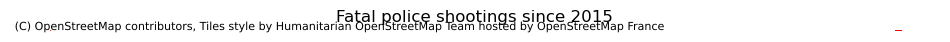

In [13]:
# start the plot (this code doesn't work here) 
fig, ax = plt.subplots(figsize=(12,12)) # figure size is size of axes lengith 12, creating an empty plot. 

# add the data options
gdf.plot(ax=ax, # our empty plot is now being set to gdf which has all the data in it. 
        marker='X', #what is the marker we want to use for every xy point
        markersize=10, #font size
        color='red') # 

# turn the axes off
ax.axis('off') #

# give it a title
ax.set_title('Fatal police shootings since 2015')

# add a basemap - add this to the plot above, and that projected in the same system as above
ctx.add_basemap(ax, crs=4326) # note that we must specify the projection here (crs)

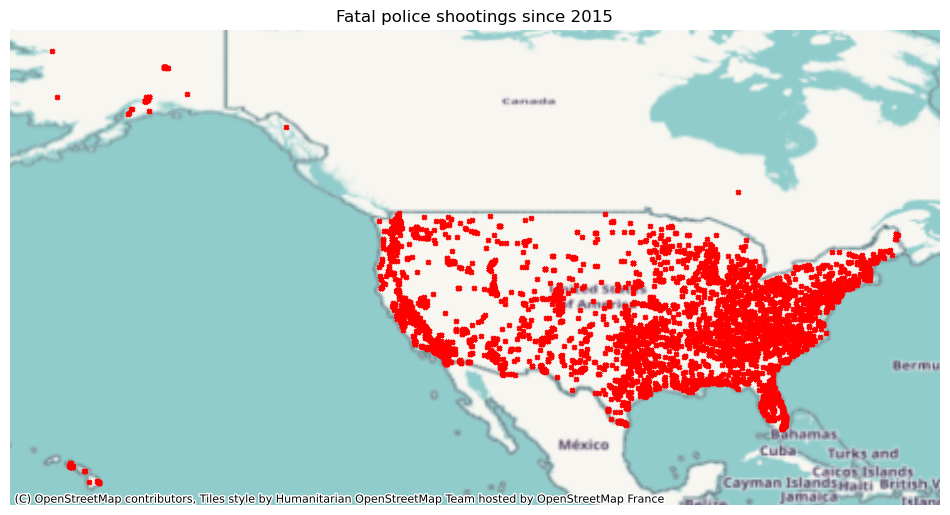

In [23]:
# start the plot (this code doesn't work here) 
fig, ax = plt.subplots(figsize=(12,12)) # figure size is size of axes lengith 12, creating an empty plot. 

# add the data options - cliping the bounds to meet the bounds of USA on map (total bounds of usa)
ax = gdf.clip([-189,18,-66,71]).plot(ax=ax, # our empty plot is now being set to gdf which has all the data in it. 
        marker='X', #what is the marker we want to use for every xy point (literally an x)
        markersize=10, #font size of the point
        color='red') # color of the marker

# turn the axes off
ax.axis('off') #

# give it a title
ax.set_title('Fatal police shootings since 2015')

# add a basemap - add this to the plot above, and that projected in the same system as above
ctx.add_basemap(ax, crs=4326) # note that we must specify the projection here (crs)

Note: You have many `marker` [options](https://matplotlib.org/stable/api/markers_api.html)

In [14]:
us = gpd.read_file('data/unitedStates.json')
us.set_crs('epsg:4326'). head()


id        name  density                                           geometry
0  01     Alabama   94.650  POLYGON ((-87.35930 35.00118, -85.60667 34.984...
1  02      Alaska    1.264  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...
2  04     Arizona   57.050  POLYGON ((-109.04250 37.00026, -109.04798 31.3...
3  05    Arkansas   56.430  POLYGON ((-94.47384 36.50186, -90.15254 36.496...
4  06  California  241.700  POLYGON ((-123.23326 42.00619, -122.37885 42.0...

Nice. What makes this process **powerful**? And what are potential **pitfalls**?

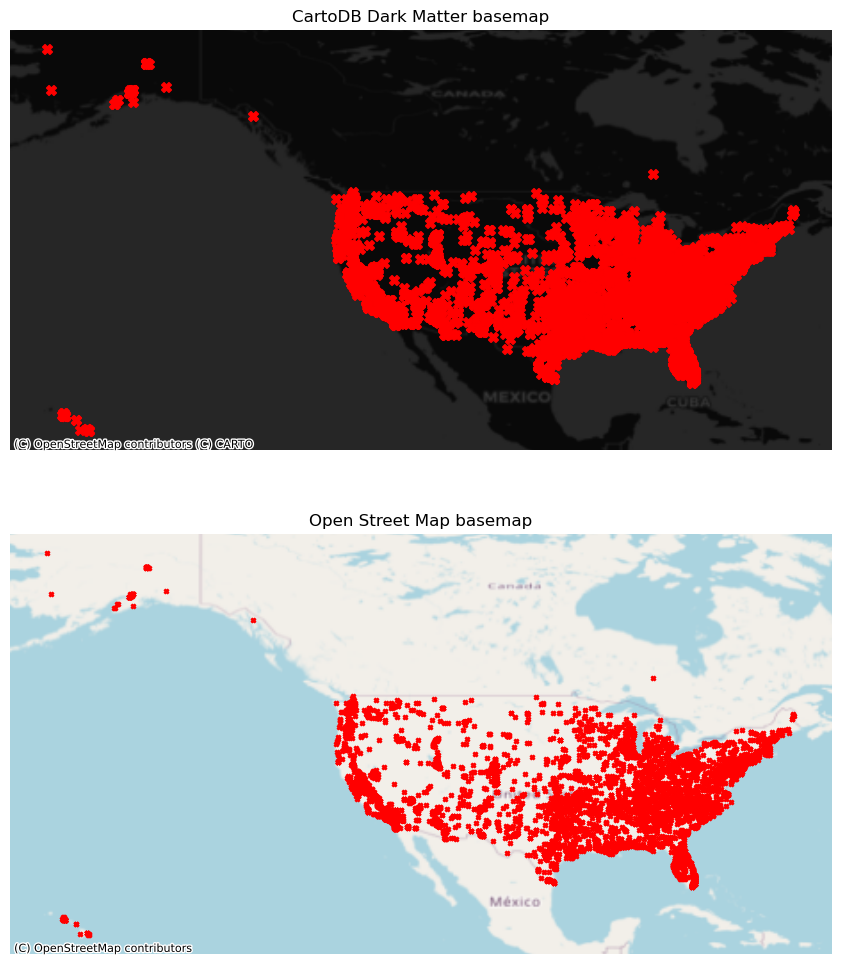

In [32]:
# two maps, different basemaps
fig, ax = plt.subplots(2,1,figsize=(20,12)) # seeting to empty plot, 2 maps, 1 map per row

# Note that 2 plots were requested, so ax has two items: ax[0] and ax[1]
usbounds = [-188,17,-66,71]
# first map
#gdf.plot(ax=ax[0], # first map, index of first map, in first row. 

gdf.clip(usbounds).plot(ax =ax[0],
                      marker='X', #leaving default marker info here
                      markersize=50,
                      color='red')

ax[0].axis('off')
ax[0].set_title('CartoDB Dark Matter basemap')  #originally 'Stamen toner basemap')

ctx.add_basemap(ax[0], source=ctx.providers.CartoDB.DarkMatter,crs=4326)   #originally Stamen.Toner,crs=4326)

# second map
gdf.clip(usbounds).plot(ax=ax[1], 
                      marker='X',
                      markersize=10,
                      color='red')

ax[1].axis('off')
ax[1].set_title('Open Street Map basemap')   #Stamen watercolor basemap')

ctx.add_basemap(ax[1], source=ctx.providers.OpenStreetMap.Mapnik, crs=4326) # Stamen.Watercolor,crs=4326)

### Multiple cities with a for loop

One of the fundamental features of coding is the "for" loop. It allows you to generate multiple outputs with a few lines of code by "looping" through various elements.

- pick cities to map 
- create a list of cities
- loop through each city to generate maps

In [34]:
# create a list of routes
cities = ["Los Angeles","San Francisco", "New York"]

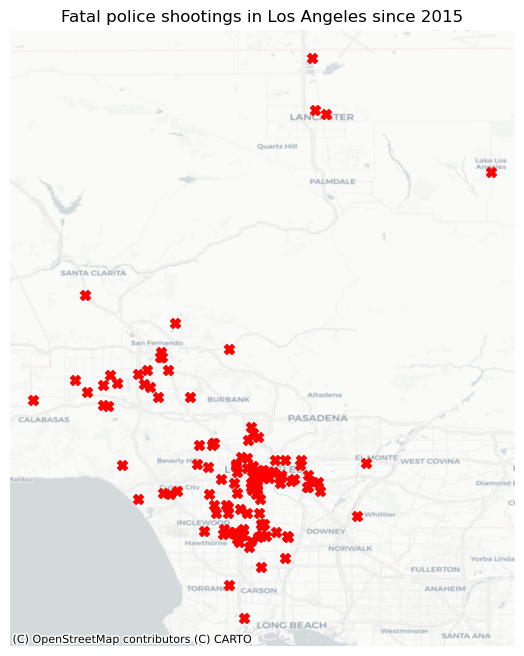

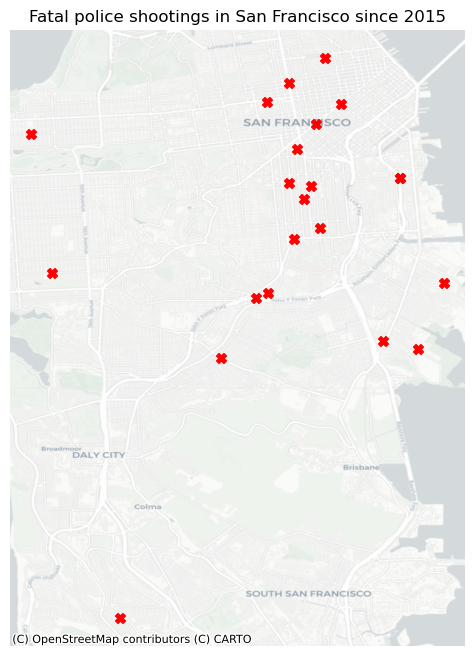

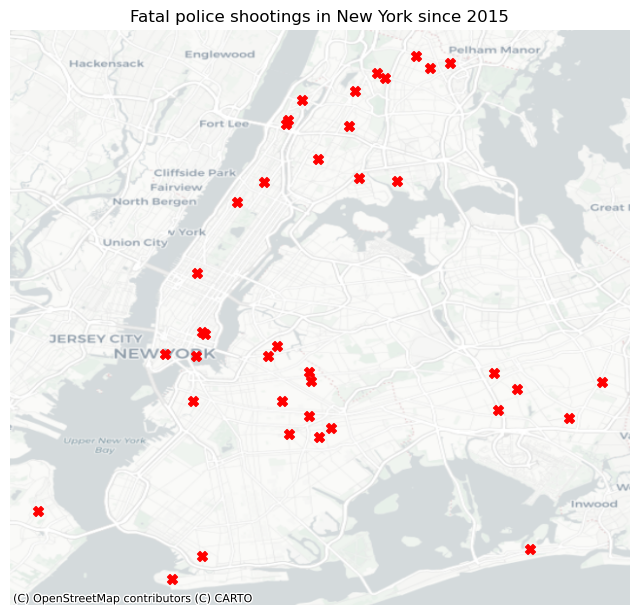

In [35]:
# loop through cities
for city in cities: # loop through the column

    # map it
    fig, ax = plt.subplots(figsize=(8,8))

    # map options: notice the query to filter by individual city
    gdf[gdf.city == city].plot(ax=ax, #this is where you put in the city rotation. Look within the column that has the city names 'city', and make one plot that is equal to the 3 cities in cities. 
                          marker='X',
                          markersize=50,
                          color='red')
# create 3 plots, because is its in square blocks, go to city column == 
    # no axes
    ax.axis('off')

    # title
    ax.set_title('Fatal police shootings in '+str(city) + ' since 2015') # convert city to string to prevent errors, overides if in number format. 

    #basemap
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=4326)

In [36]:
#if you want to search thru data to find unique cities...
unique_cities = gdf['city'].unique()
print(unique_cities)

['Shelton' 'Aloha' 'Wichita' ... 'Wildwood' 'Monmouth Junction' 'Makaha']


In [ ]:
for index, city in enumerate(gdf['city'].unique()): 
        print(f"Index:{index}, City:{city}")

# Part 2 - Socrata: An open data portal for governments

Many governments use <a href="https://dev.socrata.com/" target="_blank">socrata</a> as their platform to serve data to the public. 
<img src="../images/socrata.png" width=600>

Example: [LA County Open Data Portal](https://data.lacounty.gov/)

<table>
    <tr>
        <td><a href="https://opendata.cityofnewyork.us/" target="_blank"><img src="images/ny.png" width=400></a></td>
        <td><a href="https://datasf.org/opendata/" target="_blank"><img src="images/sf.png" width=400></a></td>
    </tr>
    <tr>
        <td><a href="https://data.cityofchicago.org/" target="_blank"><img src="images/ch.png" width=400></a></td>
        <td><a href="https://data.lacity.org/" target="_blank"><img src="images/la.png" width=400></a></td>
    </tr>
</table>

For this tutorial, we will look at LAPD's arrest data:

https://data.lacity.org/A-Safe-City/Arrest-Data-from-2020-to-Present/amvf-fr72

The <a href="https://dev.socrata.com/docs/endpoints.html" target="_blank">Socrata API</a> allows direct and real-time access to open data.

To access the data, we will use the `sodapy` library: https://github.com/xmunoz/sodapy

Instructions on how to use `sodapy` to access data for this dataset:

<a href="https://data.lacity.org/Public-Safety/Arrest-Data-from-2020-to-Present/amvf-fr72/about_data" target="_blank"><img src="images/ladata1.png"></a>

https://dev.socrata.com/foundry/data.lacity.org/amvf-fr72

### Question:
- What is the difference between exporting the data and using the API?

In [ ]:
# Difference is that API continously updates the data each time you run the code. 

### It's time to start coding: importing libraries

Let's begin our python journey. First, we identify the libraries we will use, and import them into our project:
- `pandas`
- `plotly express` - [documentation](https://plotly.com/python/plotly-express/)
- `sodapy` - [documentation](https://github.com/xmunoz/sodapy)

*Notice that we will NOT be using geopandas! Don't worry, there will still be very rewarding maps in this session*

In [38]:
# for data wrangling
import pandas as pd

# for interactive plots, similar to geopands (your choice between folium vs plotly)
import plotly.express as px

# to import open data - in order to use the API links in some of the gov websites
from sodapy import Socrata

### Creating a socrata client
Next, we acquire the data using the socrata API. Use the socrata documentation to grab the code syntax for our crime data.
- https://dev.socrata.com/foundry/data.lacity.org/amvf-fr72

In [39]:
# connect to the data portal
client = Socrata("data.lacity.org", None)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy. 250,000 would take a long time to upload/be slow
results = client.get("amvf-fr72", limit=2000)

# Convert to pandas DataFrame
arrests = pd.DataFrame.from_records(results)

# print it with .sample, which gives you random rows
arrests.sample(2)

rpt_id report_type                arst_date  time area    area_desc  \
2     6624479     BOOKING  2023-06-15T00:00:00.000  1850   07     Wilshire   
1336  6636844     BOOKING  2023-07-06T00:00:00.000  1610   15  N Hollywood   

        rd age sex_cd descent_cd  ... bkg_time       bkg_location bkg_loc_cd  \
2     0724  33      F          H  ...     2251            77TH ST       4212   
1336  1553  33      M          W  ...     2051  VALLEY - JAIL DIV       4279   

     :@computed_region_qz3q_ghft :@computed_region_k96s_3jcv  \
2                          23667                         626   
1336                        8890                         344   

     :@computed_region_tatf_ua23 :@computed_region_ur2y_g4cx  \
2                           1086                         NaN   
1336                        1336                          17   

     :@computed_region_kqwf_mjcx :@computed_region_2dna_qi2s crsst  
2                              7                          26   NaN  
1336                           5                          39   NaN  

[2 rows x 31 columns]

### Import data based on a query string
That's great! But what if you wanted something specific, like "all arrests in July, 2021?"

In [40]:
# add a "where" statement
results = client.get("amvf-fr72", 
                     limit = 10000, # putting an arbitrary high number (otherwise defaults to 1000)
                     where = "arst_date between '2023-01-01T00:00:00' and '2023-02-01T00:00:00'" #query a particular column, and paste as a string here
                    )

In [41]:
# Convert to pandas DataFrame
arrests = pd.DataFrame.from_records(results)

### Data Exploration and Analysis

In [42]:
# how many rows and columns?
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4782 entries, 0 to 4781
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rpt_id           4782 non-null   object
 1   report_type      4782 non-null   object
 2   arst_date        4782 non-null   object
 3   time             4781 non-null   object
 4   area             4782 non-null   object
 5   area_desc        4782 non-null   object
 6   rd               4782 non-null   object
 7   age              4782 non-null   object
 8   sex_cd           4782 non-null   object
 9   descent_cd       4782 non-null   object
 10  chrg_grp_cd      4479 non-null   object
 11  grp_description  4479 non-null   object
 12  arst_typ_cd      4782 non-null   object
 13  charge           4782 non-null   object
 14  chrg_desc        4479 non-null   object
 15  dispo_desc       4405 non-null   object
 16  location         4782 non-null   object
 17  crsst            1888 non-null   

In [50]:
# what fields and datatypes?
arrests.dtypes
#every arrest has lat and long
arrests.info(verbose=True, show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4782 entries, 0 to 4781
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rpt_id           4782 non-null   object
 1   report_type      4782 non-null   object
 2   arst_date        4782 non-null   object
 3   time             4781 non-null   object
 4   area             4782 non-null   object
 5   area_desc        4782 non-null   object
 6   rd               4782 non-null   object
 7   age              4782 non-null   object
 8   sex_cd           4782 non-null   object
 9   descent_cd       4782 non-null   object
 10  chrg_grp_cd      4479 non-null   object
 11  grp_description  4479 non-null   object
 12  arst_typ_cd      4782 non-null   object
 13  charge           4782 non-null   object
 14  chrg_desc        4479 non-null   object
 15  dispo_desc       4405 non-null   object
 16  location         4782 non-null   object
 17  crsst            1888 non-null   

In [ ]:
# what are the first 5 rows?


## Introducting plotly

Now, use plotly express to create a bar chart.

- https://plotly.com/python/bar-charts/

What are the differences between matplotlib and plotly?

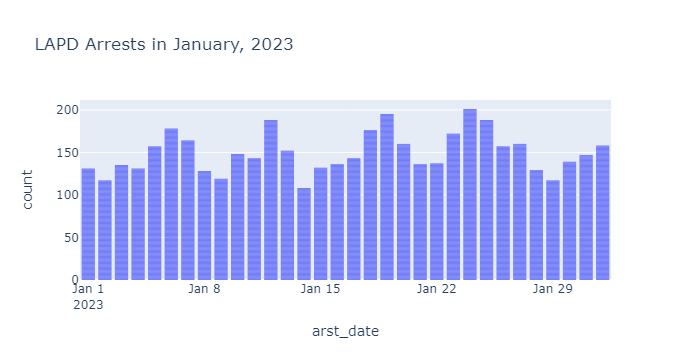

In [48]:
# a simple bar chart, putting date on the x-axis
fig = px.bar(arrests, #plot is called fig, with the plotly bar chart i.e. px.bar
       x='arst_date',
       title='LAPD Arrests in January, 2023'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

### Label axis

In plotly, you can relabel text by providing a dictionary as shown below:

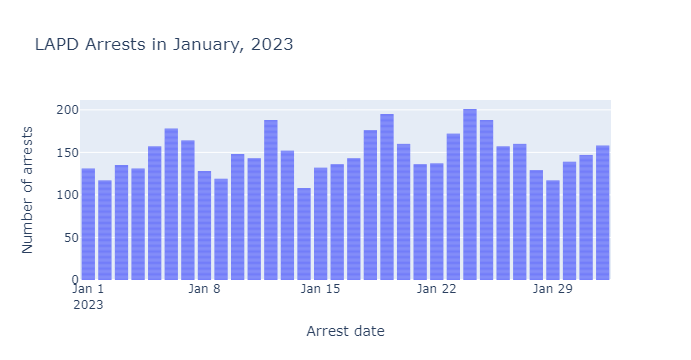

In [54]:
# add labels by providing a dict
fig = px.bar(
        arrests,
        x='arst_date',
        title='LAPD Arrests in January, 2023',
        labels={ #feeding the dictionary - i.e. rename the columns. relabel x axis to arrest date, then y is ... use squiggly bracket
            'arst_date':'Arrest date',
            'count':'Number of arrests'
        }
)

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

Let's dig in further... what if we want to see the distribution of charge types by day?

In [51]:
# show me distinct value of charges, within arrest, go to group description column, then for every unique group description, we're sending that to a list. 
arrests.grp_description.unique().tolist()

['Receive Stolen Property',
 'Narcotic Drug Laws',
 'Aggravated Assault',
 'Driving Under Influence',
 'Robbery',
 'Vehicle Theft',
 'Other Assaults',
 'Larceny',
 'Weapon (carry/poss)',
 'Miscellaneous Other Violations',
 'Forgery/Counterfeit',
 'Burglary',
 'Moving Traffic Violations',
 'Homicide',
 'Sex (except rape/prst)',
 'Against Family/Child',
 nan,
 'Disorderly Conduct',
 'Drunkeness',
 'Fraud/Embezzlement',
 'Prostitution/Allied',
 'Liquor Laws',
 'Rape',
 'Non-Criminal Detention',
 'Disturbing the Peace',
 'Gambling',
 'Federal Offenses']

In [55]:
# show me distinct value of charges
arrest_by_charge = arrests.value_counts('grp_description').reset_index(name='count')
arrest_by_charge
# so what did that mean? for the 4k arrest data, count number of instances of description. then reset the index to --
# reset the indecx on count of unique group descriptions of this data set. Look up the value counts and reset index funtions.

grp_description  count
0               Aggravated Assault    679
1   Miscellaneous Other Violations    596
2                   Other Assaults    518
3          Driving Under Influence    420
4               Narcotic Drug Laws    381
5              Weapon (carry/poss)    356
6                          Larceny    278
7                    Vehicle Theft    218
8                          Robbery    179
9              Prostitution/Allied    148
10                        Burglary    133
11       Moving Traffic Violations    113
12              Disorderly Conduct     85
13            Against Family/Child     72
14          Sex (except rape/prst)     55
15              Fraud/Embezzlement     43
16                        Gambling     39
17                      Drunkeness     32
18                     Liquor Laws     32
19         Receive Stolen Property     31
20                        Homicide     26
21                            Rape     17
22             Forgery/Counterfeit     13
23          Non-Criminal Detention      8
24                Federal Offenses      4
25            Disturbing the Peace      3

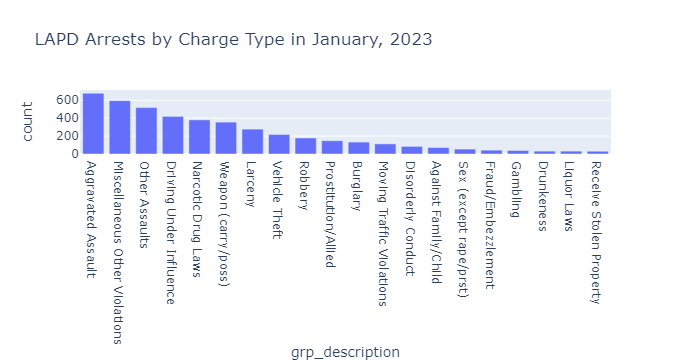

In [56]:
# plot the top 20 charges - first bar chart was just a day, and this one is by charge instead. 
fig = px.bar(arrest_by_charge.head(20),
       x='grp_description', #by descrition because of the previous sort done to make the list arrest_by_charge
       y='count',
       title='LAPD Arrests by Charge Type in January, 2023')

fig.show()

### Stacked bar charts

What if you wanted to find out the distribution of crime types per day?

In [57]:
arrests_grouped = arrests.value_counts(['arst_date','grp_description']).reset_index(name='count')
arrests_grouped

arst_date                 grp_description  count
0    2023-01-24T00:00:00.000  Miscellaneous Other Violations     32
1    2023-01-25T00:00:00.000             Prostitution/Allied     32
2    2023-01-14T00:00:00.000              Aggravated Assault     30
3    2023-01-12T00:00:00.000  Miscellaneous Other Violations     30
4    2023-01-13T00:00:00.000              Aggravated Assault     28
..                       ...                             ...    ...
556  2023-01-03T00:00:00.000             Prostitution/Allied      1
557  2023-01-22T00:00:00.000         Receive Stolen Property      1
558  2023-01-17T00:00:00.000                      Drunkeness      1
559  2023-01-15T00:00:00.000              Disorderly Conduct      1
560  2023-01-01T00:00:00.000            Against Family/Child      1

[561 rows x 3 columns]

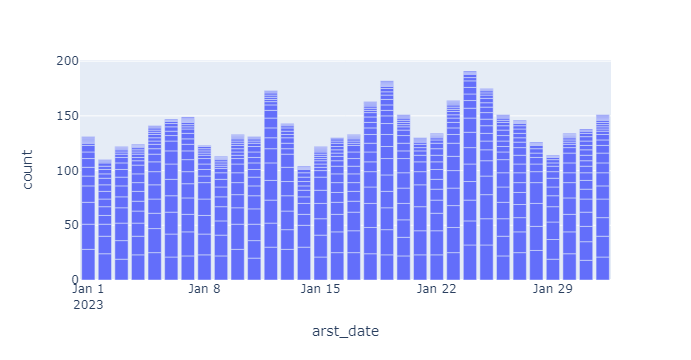

In [58]:
# make a bar chart groupings by group description
fig = px.bar(arrests_grouped,
       x='arst_date',
       y='count'
)

fig.show()

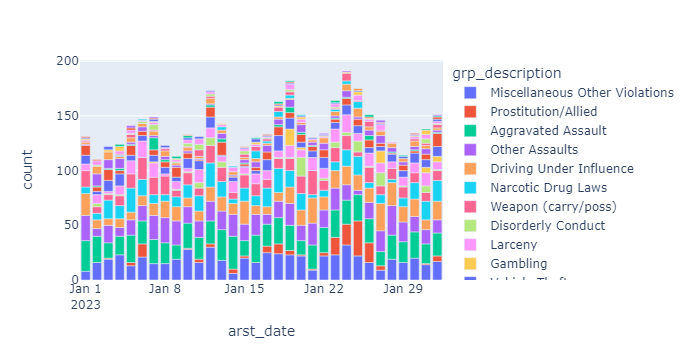

In [59]:
# make a stacked bar chart
fig = px.bar(arrests_grouped,
       x='arst_date',
       y='count',
       color='grp_description' # this creates the "stack"ed bar chart effect and adds a legend
)

fig.show()

Now it's your turn!

* Add a title
* Clean up the labels (arst_date, grp_description, etc)

In [ ]:
# in plotly there is a way to update layout... See Chris's code, so feeding arg then you have X axis you have Arrest Date, and type. so put in those labels. 

## Data cleanup: subsetting your data

Let's go back to the original dataset.

In [60]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4782 entries, 0 to 4781
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rpt_id           4782 non-null   object
 1   report_type      4782 non-null   object
 2   arst_date        4782 non-null   object
 3   time             4781 non-null   object
 4   area             4782 non-null   object
 5   area_desc        4782 non-null   object
 6   rd               4782 non-null   object
 7   age              4782 non-null   object
 8   sex_cd           4782 non-null   object
 9   descent_cd       4782 non-null   object
 10  chrg_grp_cd      4479 non-null   object
 11  grp_description  4479 non-null   object
 12  arst_typ_cd      4782 non-null   object
 13  charge           4782 non-null   object
 14  chrg_desc        4479 non-null   object
 15  dispo_desc       4405 non-null   object
 16  location         4782 non-null   object
 17  crsst            1888 non-null   

In [ ]:
#descent cd is what the percieved ethnicity from the cop re: the arrestee's race

That's a lot of fields. Let's create a subset of the data with just the following fields:

- `arst_date`
- `age`
- `descent_cd`
- `grp_description`
- `lat`
- `lon`

In list format:
```
['arst_date','age','descent_cd','grp_description','lat','lon']
```

In [62]:
# subset the data below (don't forget to add .copy at the end) so you don't end up overwriting the data.
arrests_mini = arrests[['arst_date','age','descent_cd','grp_description','lat','lon']].copy()

In [63]:
# get info for our subset data
arrests_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4782 entries, 0 to 4781
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   arst_date        4782 non-null   object
 1   age              4782 non-null   object
 2   descent_cd       4782 non-null   object
 3   grp_description  4479 non-null   object
 4   lat              4782 non-null   object
 5   lon              4782 non-null   object
dtypes: object(6)
memory usage: 224.3+ KB


Our `lat` and `lon` columns need to be of data type float. Let's convert them.

In [64]:
# convert lat/lon's to floats
arrests_mini['lat'] = arrests_mini['lat'].astype(float)
arrests_mini['lon'] = arrests_mini['lon'].astype(float)
arrests_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4782 entries, 0 to 4781
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   arst_date        4782 non-null   object 
 1   age              4782 non-null   object 
 2   descent_cd       4782 non-null   object 
 3   grp_description  4479 non-null   object 
 4   lat              4782 non-null   float64
 5   lon              4782 non-null   float64
dtypes: float64(2), object(4)
memory usage: 224.3+ KB


What happens if we create a scatter plot, placing `lon` in the x-axis `lat` in the y-axis?

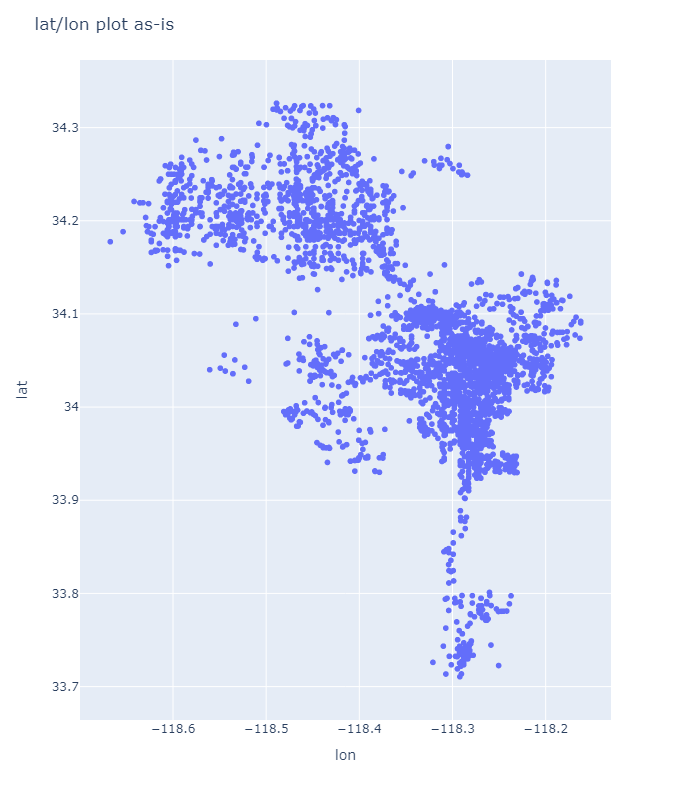

In [65]:
# plot it
fig = px.scatter(arrests_mini,
           x='lon', # notice its LONGitude on this, not lat for x axis
           y='lat'
)

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "lat/lon plot as-is"
)

# make it a square grid
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
)

fig.show()

## Plotly maps
Plotly has support for a mapbox slippy map. 

- https://plotly.com/python/scattermapbox/

Have fun with this, and change the `mapbox_style` attribute to any of the following:

* `open-street-map`
* `white-bg`
* `carto-positron`
* `carto-darkmatter`
* `stamen-terrain`
* `stamen-toner`
* `stamen-watercolor`


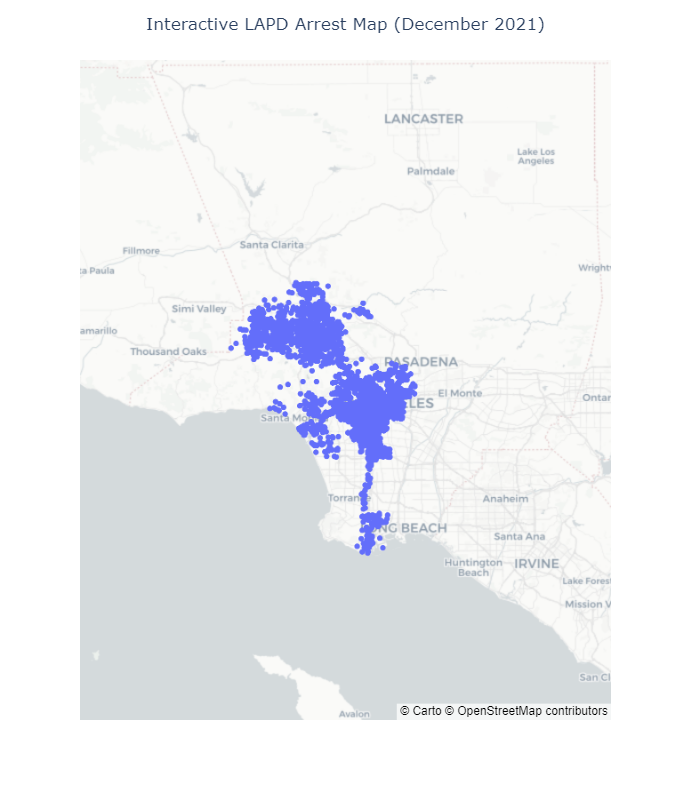

In [66]:
fig = px.scatter_mapbox(arrests_mini, #can change style, similar to contextly's maps. 
                        lat='lat',
                        lon='lon',
                        mapbox_style="carto-positron")

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Interactive LAPD Arrest Map (December 2021)",
    title_x=0.5 # aligns title to center
)

fig.show()

In [ ]:
# before you run this cell, what do you think it will produce?
fig = px.scatter_mapbox(arrests_mini, 
                        lat="lat", 
                        lon="lon", 
                        color="descent_cd",
                        labels={'descent_cd':'Race'},
                        mapbox_style="carto-positron"
                       )

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Interactive LAPD Arrest Map (January 2023)",
    title_x=0.5 # aligns title to center
)


fig.show()

Look at the function below, and see if you can figure out what it is meant to do:

In [68]:
def race_map(race='H'):
    
    fig = px.scatter_mapbox(
                            arrests_mini[arrests_mini.descent_cd==race], 
                            lat="lat", 
                            lon="lon", 
                            color="descent_cd",
                            labels={'descent_cd':'Race'},
                            mapbox_style="carto-positron"
    )

    # options on the layout
    fig.update_layout(
        width = 600,
        height = 600,
        title = "Interactive LAPD Arrest Map (January 2023)<br>Showing where descent label is "+race,
        title_x=0.5 # aligns title to center
    )

    fig.show()

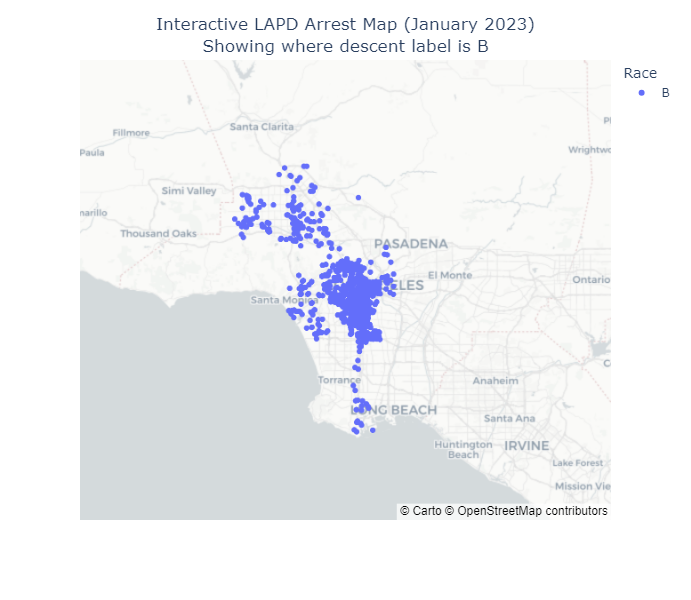

In [69]:
# call the function (try other values)
race_map(race='B')

## Using a loop

In [70]:
# get a list of distinct race values
race_list = arrests_mini.descent_cd.unique().tolist()
race_list

['H', 'O', 'W', 'B', 'F', 'A', 'K', 'C', 'X']

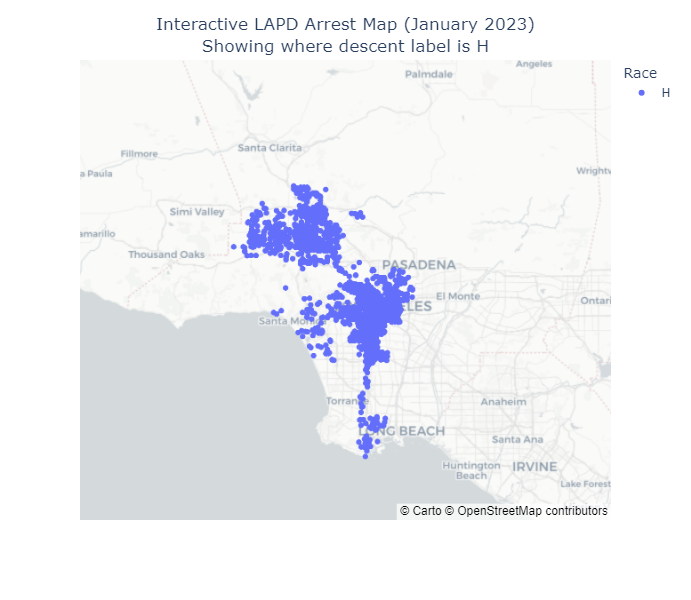

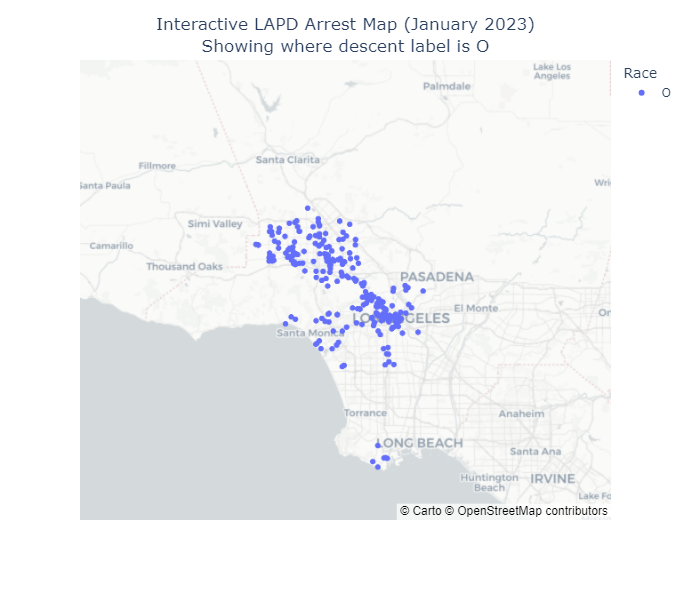

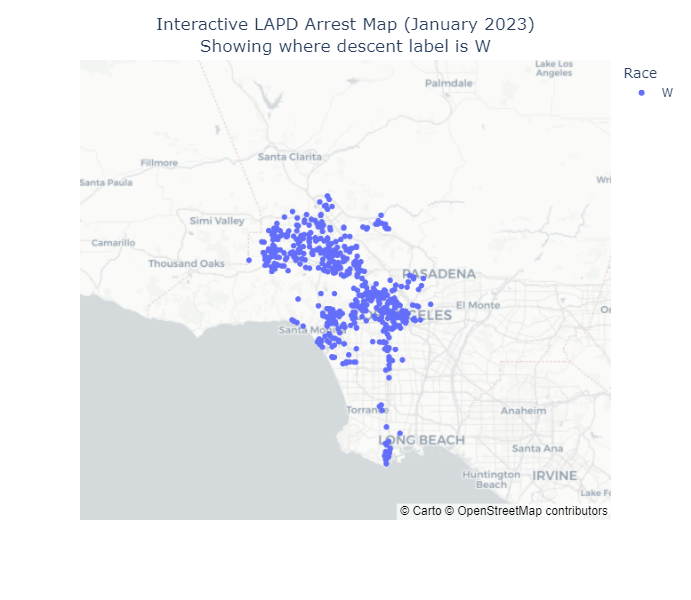

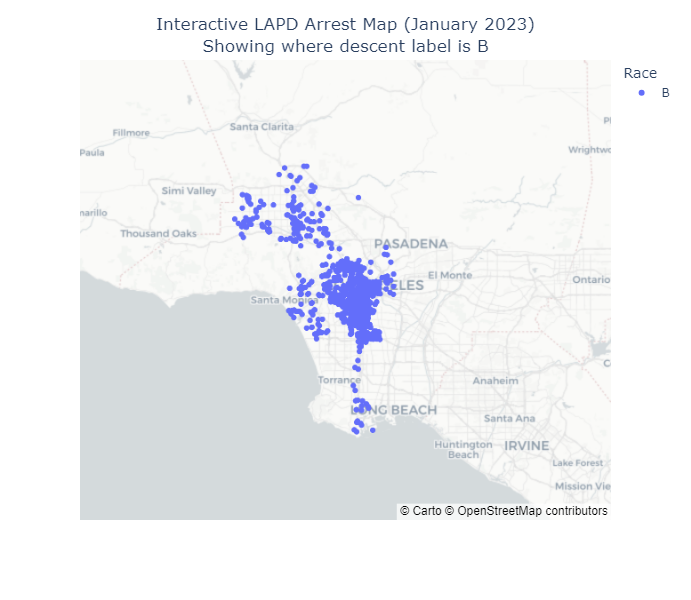

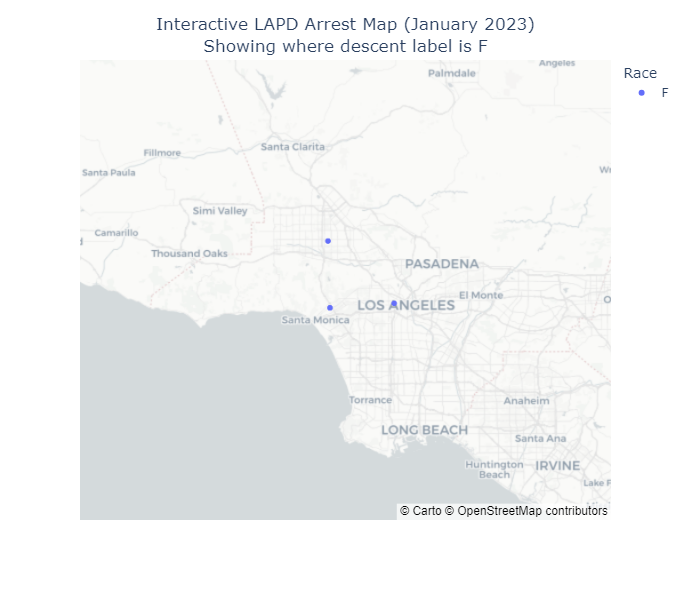

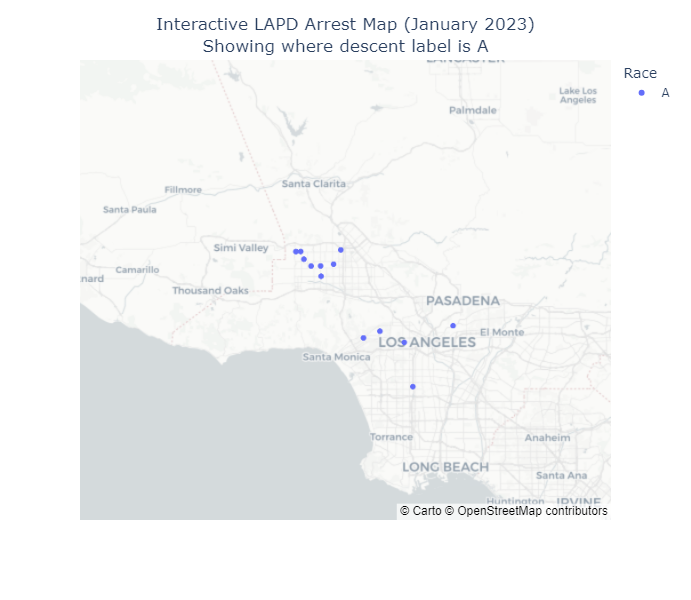

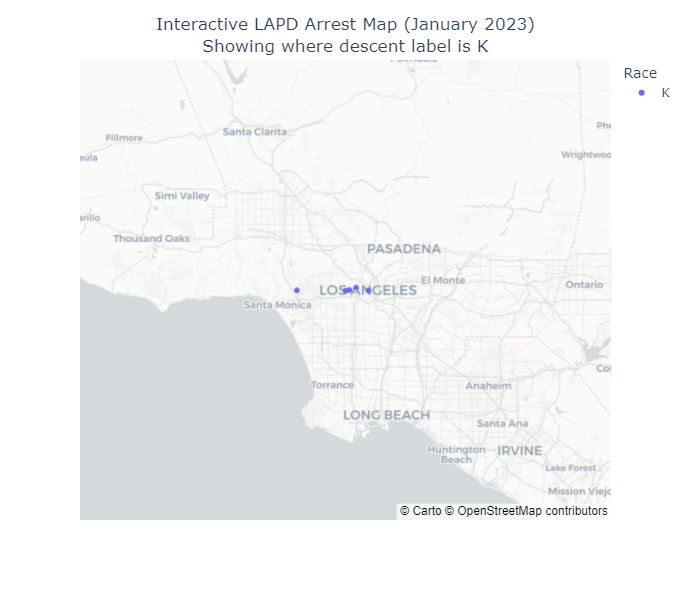

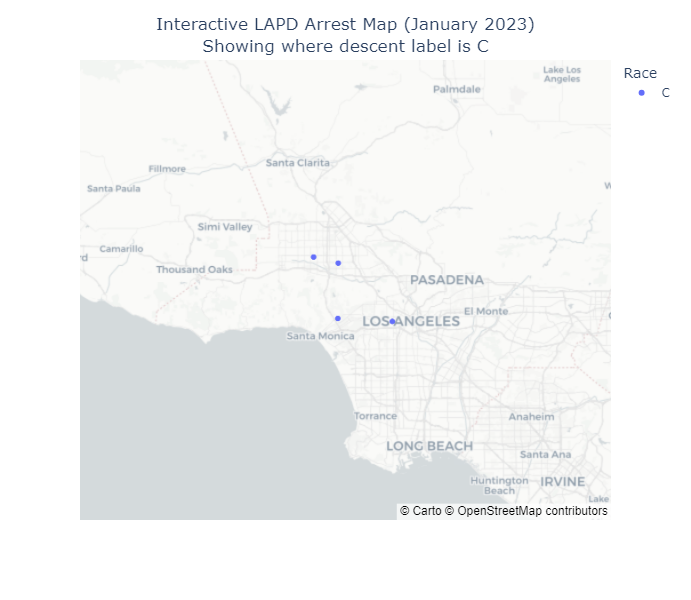

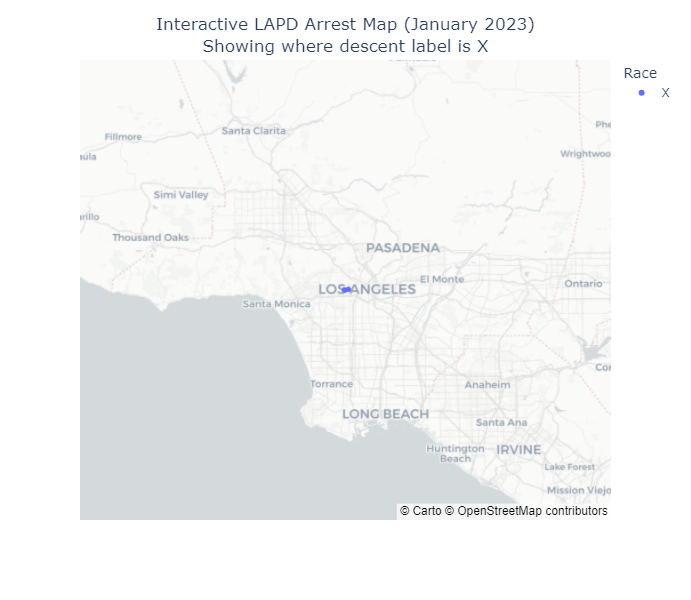

In [71]:
# loop and map!
for race in race_list:
    race_map(race)

# Summarize by neighborhoods

Bring in neighborhoods directly from source:

- https://geohub.lacity.org/datasets/lahub::la-times-neighborhood-boundaries/about

In [72]:
neighborhoods = gpd.read_file("https://services5.arcgis.com/7nsPwEMP38bSkCjy/arcgis/rest/services/LA_Times_Neighborhoods/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson")

<Axes: >

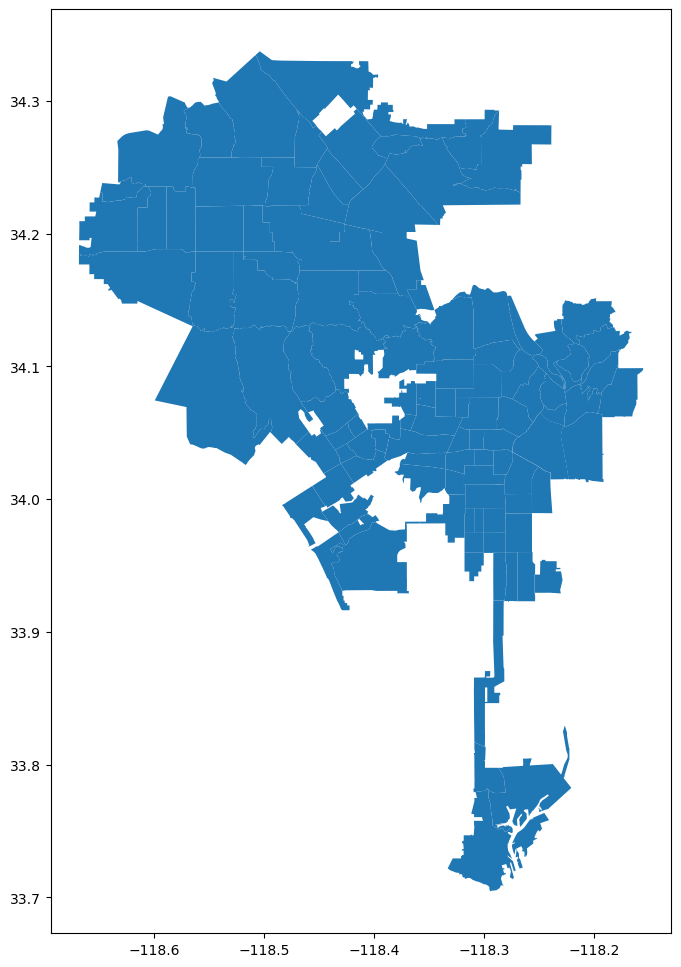

In [73]:
neighborhoods.plot(figsize=(12,12))

<Axes: >

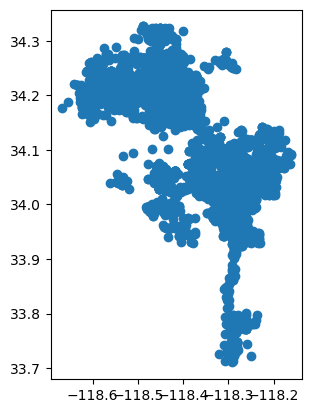

In [74]:
# convert arrests_mini to geodataframe
gdf = gpd.GeoDataFrame(
    arrests_mini, geometry=gpd.points_from_xy(arrests_mini.lon, arrests_mini.lat),crs=4326)

# check that it can be mapped
gdf.plot()

In [75]:
# conduct a spatial join (i.e. assign each arrest to the neighborhood it is in)
arrest_by_neighborhood = gpd.sjoin(neighborhoods, gdf) #Spatial join Points to polygons
arrest_by_neighborhood

OBJECTID             name  \
0           1  Adams-Normandie   
0           1  Adams-Normandie   
0           1  Adams-Normandie   
0           1  Adams-Normandie   
0           1  Adams-Normandie   
..        ...              ...   
113       114      Lake Balboa   
113       114      Lake Balboa   
113       114      Lake Balboa   
113       114      Lake Balboa   
113       114      Lake Balboa   

                                              geometry  index_right  \
0    POLYGON ((-118.30069 34.03731, -118.30388 34.0...         3727   
0    POLYGON ((-118.30069 34.03731, -118.30388 34.0...         2214   
0    POLYGON ((-118.30069 34.03731, -118.30388 34.0...         1015   
0    POLYGON ((-118.30069 34.03731, -118.30388 34.0...         1543   
0    POLYGON ((-118.30069 34.03731, -118.30388 34.0...         4172   
..                                                 ...          ...   
113  POLYGON ((-118.50116 34.22114, -118.50116 34.2...         4277   
113  POLYGON ((-118.50116 34.22114, -118.50116 34.2...         2598   
113  POLYGON ((-118.50116 34.22114, -118.50116 34.2...         1949   
113  POLYGON ((-118.50116 34.22114, -118.50116 34.2...         1658   
113  POLYGON ((-118.50116 34.22114, -118.50116 34.2...         4576   

                   arst_date age descent_cd                 grp_description  \
0    2023-01-25T00:00:00.000  17          B                        Homicide   
0    2023-01-16T00:00:00.000  31          H                  Other Assaults   
0    2023-01-08T00:00:00.000  19          H                   Vehicle Theft   
0    2023-01-11T00:00:00.000  39          H              Aggravated Assault   
0    2023-01-28T00:00:00.000  27          H                   Vehicle Theft   
..                       ...  ..        ...                             ...   
113  2023-01-29T00:00:00.000  31          H  Miscellaneous Other Violations   
113  2023-01-19T00:00:00.000  44          H             Forgery/Counterfeit   
113  2023-01-14T00:00:00.000  29          H                  Other Assaults   
113  2023-01-12T00:00:00.000  39          H              Aggravated Assault   
113  2023-01-31T00:00:00.000  26          W                        Burglary   

         lat       lon  
0    34.0291 -118.2970  
0    34.0309 -118.2970  
0    34.0327 -118.3002  
0    34.0337 -118.3003  
0    34.0346 -118.2964  
..       ...       ...  
113  34.2084 -118.5143  
113  34.2084 -118.5012  
113  34.2121 -118.5027  
113  34.2164 -118.5143  
113  34.2179 -118.5014  

[4735 rows x 10 columns]

In [76]:
# count the number of records per community -- this is the new chart/table we're making, then adding this to df below. 
arrest_counts = arrest_by_neighborhood.value_counts('name').reset_index(name='arrest_count')
arrest_counts

name  arrest_count
0          Downtown           392
1          Westlake           277
2          Van Nuys           232
3         Hollywood           214
4          Florence           128
..              ...           ...
107  Elysian Valley             2
108   Cheviot Hills             1
109     Beverlywood             1
110         Bel-Air             1
111  Windsor Square             1

[112 rows x 2 columns]

In [77]:
# add the count to the neighborhoods - both data sets have a name column, joining to the left of neighborhood. On is very important which is shared column name in both data sets. 
neighborhoods = neighborhoods.merge(arrest_counts, how='left', on='name')

In [78]:
neighborhoods.sample(10)

OBJECTID            name  \
12         13     Canoga Park   
105       106      West Hills   
62         63   Mission Hills   
65         66     North Hills   
86         87     Studio City   
15         16    Century City   
72         73  Pico-Robertson   
24         25      Eagle Rock   
8           9     Beverlywood   
73         74      Pico-Union   

                                              geometry  arrest_count  
12   POLYGON ((-118.58854 34.23305, -118.58853 34.2...          98.0  
105  POLYGON ((-118.60375 34.23324, -118.60300 34.2...          18.0  
62   POLYGON ((-118.46788 34.28986, -118.46774 34.2...          29.0  
65   POLYGON ((-118.49525 34.22023, -118.49569 34.2...          78.0  
86   POLYGON ((-118.40343 34.15663, -118.40275 34.1...          30.0  
15   POLYGON ((-118.41267 34.06073, -118.41222 34.0...          34.0  
72   POLYGON ((-118.37731 34.06095, -118.37728 34.0...          10.0  
24   POLYGON ((-118.19820 34.15160, -118.19821 34.1...          19.0  
8    POLYGON ((-118.38609 34.04675, -118.38934 34.0...           1.0  
73   POLYGON ((-118.28146 34.05250, -118.28094 34.0...          59.0

<Axes: >

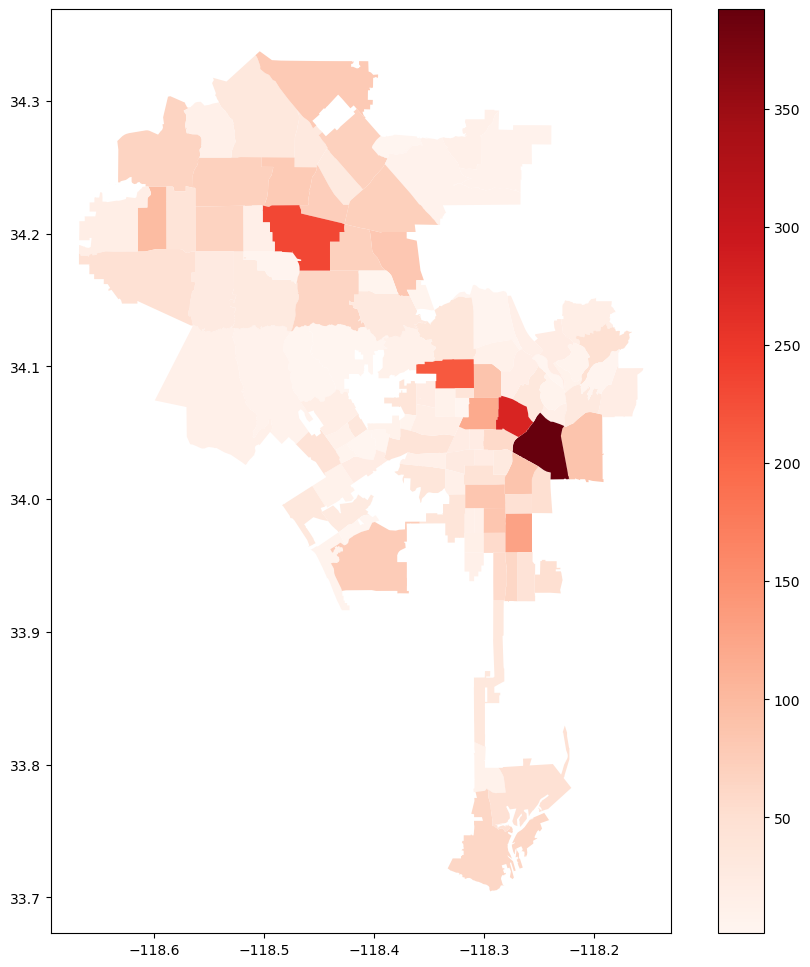

In [79]:
# choropleth map of arrests by neighborhoods
fig,ax = plt.subplots(figsize=(12,12))

neighborhoods.plot(ax=ax,column='arrest_count',legend=True,cmap='Reds')


<div class="alert alert-info">
Now it's your turn!

* Make the final map output "prettier"
* Find a socrata based open dataset
* Use the sodapy library and import it
* Conduct data exploration and analysis
* Create two or more plots using the plotly express library
* Create map visualization using plotly and/or the KeplerGL libraries
</div>
